Mines Ponts Physique MP 2016 Le Millenium Bridge.

Lien vers le sujet : https://www.doc-solus.fr/prepa/sci/adc/bin/view.corrige.html?q=MP_PHYSIQUE_MINES_1_2016

# I. Oscillateur simple 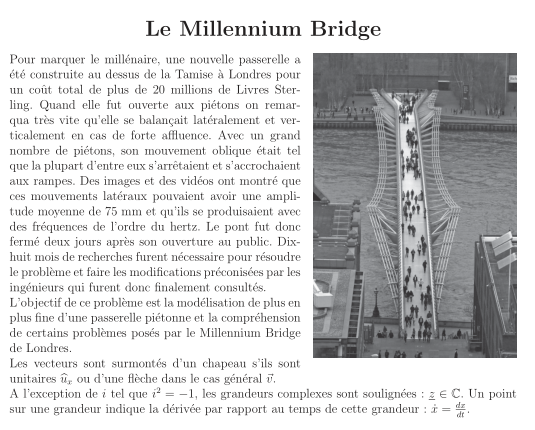

## 1 - mise en équation 

En appliquant le PFD projeté sur le vecteur $\hat{u}_x$ :

$$
m \ddot{x} = - k (x - l_0) - \alpha \dot{x} - mg
$$

La position d'équilibre $\tilde{x}$ s'écrit $\tilde{x} = l_0 - g/\omega_0^2$. En posant $X = x - \tilde{x}$ et en identifiant $2 \xi \omega_0 = \alpha / m$ et $\omega_0^2 = k / m$, on obtient : 

$$
\ddot{X} + 2 \xi \omega_0  \dot{X}  + \omega_0^2 X = 0 
$$

$\omega_0$ est la fréquence propre du système: c'est la pulsation auquel le système se mettra à vibrer si on l'écarte de sa position d'équilibre et que l'amortissement est nul. $\xi$ et le coefficient d'amortissement, qui peut être relié au temps de relaxation du système (voir https://fr.wikipedia.org/wiki/Constante_de_temps). 

## 2 - solutions du régime libre 

L'équation obtenue est une équation différentielle linéaire à coefficients réels constants d'ordre 2. La solution s'écrit, en posant $\omega _{d} = \omega _{0}{\sqrt {1-\xi ^{2}}}$, 

$$  
X(t)=e^{-\omega _{0}\xi t}(C\cos{\omega _{d}t}+D \sin{\omega_{d}t})
$$

Les conditions initiales sont $X(0) = X_0$ et $\dot{X}(0) = V_0$. Si on résoud, l'équation on obtient:

$$
\left \{
\begin{aligned}
C && = && X_0 \\
D && = && \frac{1}{\omega_d} ( V_0 + \omega_0 \xi X_0 )
\end{aligned}
\right .
$$

Illustrons ceci : 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

In [2]:
@interact(xi=(0, 1, 0.01), omega_0=(0, 2, 0.1))
def plot_solution(xi=0.05, X_0=1, V_0=1, omega_0=1):
    omega_d = omega_0 * np.sqrt(1 - xi**2)
    T = 2 * np.pi / omega_d
    t = np.linspace(0, 10, num=200) * T
    C = X_0
    D = 1/omega_d * (V_0 + omega_0 * xi * X_0)
    solution = np.exp(-omega_0 * xi * t) * (C * np.cos(omega_d * t) + D * np.sin(omega_d * t))
    fig, ax = plt.subplots()
    ax.plot(t, solution)
    ax.set_xlabel(r'$n$ périodes ($=f(\omega_d)$)')

interactive(children=(FloatSlider(value=0.05, description='xi', max=1.0, step=0.01), IntSlider(value=1, descri…

La conséquence de l'ajout d'une force de vent peut induire une divergence exponentielle si la force $\beta \dot{x} \hat{u}_x$ est plus grande que la force de frottement.

## 3 - forçage piétonnier 

On s'intéresse à la solution en régime établi. On utilise pour cela la notation complexe. Si on insère la relation $x = Y + \tilde{x} - F_0 / (m \omega_0^2)$ dans l'équation du PFD, on obtient finalement :

$$
\ddot{Y} + 2 \xi \omega_0  \dot{Y}  + \omega_0^2 Y = - F_1 / m \cos{2 \pi f t}
$$


On peut alors déterminer la fonction de transfert suivante, où $\Omega = \omega / \omega_0$ :

$$
\underline{H} = \underline{Y} / \underline{E} = \frac{1}{-\omega^2 + j 2\xi \omega_0 \omega + \omega_0^2} = \frac{1/\omega_0^2}{1 -\Omega^2 + j 2\xi \Omega}  
$$

## 4 - résonance 

On obtient l'expression du module de la fonction de transfert ainsi :

$$
|\underline{H}| = \frac{ 1/\omega_0^2 \sqrt{(1 - \Omega^2)^2 + 4 \xi^2 \Omega^2} }{ (1 - \Omega^2)^2 + 4 \xi^2 \Omega^2 }
$$

Si il y a résonance, c'est qu'on a minimisé le dénominateur. Une condition nécessaire est l'annulation de la dérivée par rapport à $\Omega$. Ceci équivaut à 

$$
\Omega_r = \sqrt{ 1 - 2 \xi ^2 }
$$

Traçons ceci :

In [3]:
@interact(xi=(0.01, 1, 0.01), omega_0=(0.01, 10, 0.01))
def plot_transfer_func_magnitude(omega_0=1., xi=0.05):
    Omega = np.linspace(0, 10, num=1000) / omega_0
    numer = 1/omega_0 **2 * np.sqrt((1 - Omega**2)**2 + 4 * xi**2 * Omega**2) 
    denum = (1 - Omega**2)**2 + 4 * xi**2 * Omega**2
    magnitude = numer / denum
    
    maxi = np.max(magnitude)
    Omega_r = np.sqrt(1 - 2 * xi**2)
    
    resonance_amp = 1 / (2 * omega_0 ** 2 * xi)
    
    fig, ax = plt.subplots()
    ax.plot(Omega, magnitude)
    ax.set_xlabel(r'$\Omega$')
    ax.set_ylabel('module de la fonction de transfert')
    ax.vlines(Omega_r, 0, maxi, label='$\Omega_r$')
    ax.hlines(resonance_amp, 0, Omega.max(), label='resonance amp', color='blue')
    ax.legend()

interactive(children=(FloatSlider(value=1.0, description='omega_0', max=10.0, min=0.01, step=0.01), FloatSlide…